<a href="https://colab.research.google.com/github/Hubobv/AI_W4/blob/main/Homework_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=234f28a122d79ff8484638eea78bf76eff305cddbdc1fee6c8ccf78e1a2832c0
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


1.0573717528923816


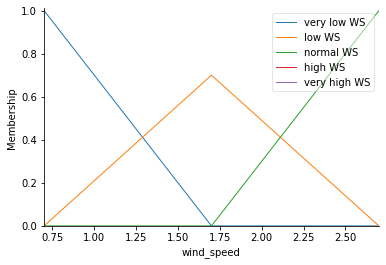

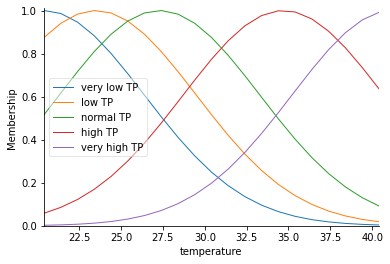

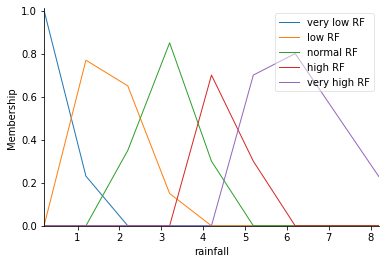

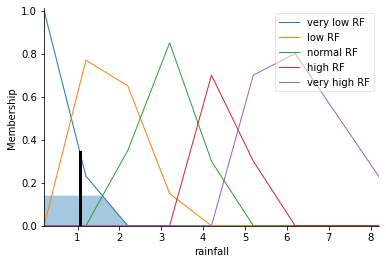

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind_speed = ctrl.Antecedent(np.arange(0.7,3.2,1),'wind_speed')
temperature = ctrl.Antecedent(np.arange(20.4,41.3,1),'temperature')

rainfall = ctrl.Consequent(np.arange(0.2,9.2,1),'rainfall')

wind_speed['very low WS'] = fuzz.trimf(wind_speed.universe,[0.7,0.7,1.4])
wind_speed['low WS'] = fuzz.trimf(wind_speed.universe,[0.7,1.4,2.4])
wind_speed['normal WS'] = fuzz.trimf(wind_speed.universe,[2.4,2.7,2.9])
wind_speed['high WS'] = fuzz.trimf(wind_speed.universe,[2.7,2.9,3])
wind_speed['very high WS'] = fuzz.trimf(wind_speed.universe,[2.9,3,3.1])

temperature['very low TP'] = fuzz.gaussmf(temperature.universe,20.4,6)
temperature['low TP'] = fuzz.gaussmf(temperature.universe,23.5,6)
temperature['normal TP'] = fuzz.gaussmf(temperature.universe,27.3,6)
temperature['high TP'] = fuzz.gaussmf(temperature.universe,34.7,6)
temperature['very high TP'] = fuzz.gaussmf(temperature.universe,41.2,6)

rainfall['very low RF'] = fuzz.trimf(rainfall.universe,[0.2,0.2,1.5])
rainfall['low RF'] = fuzz.trimf(rainfall.universe,[0.2,1.5,3.5])
rainfall['normal RF'] = fuzz.trimf(rainfall.universe,[1.5,3.5,4.5])
rainfall['high RF'] = fuzz.trimf(rainfall.universe,[3.5,4.5,5.5])
rainfall['very high RF'] = fuzz.trimf(rainfall.universe,[4.5,5.5,9])

wind_speed.view()
temperature.view()
rainfall.view()

rule1 = ctrl.Rule(wind_speed['very low WS']&temperature['very low TP'],rainfall['very low RF'])
rule2 = ctrl.Rule(wind_speed['low WS']&temperature['low TP'],rainfall['very low RF'])
rule3 = ctrl.Rule(wind_speed['very high WS']&temperature['very high TP'],rainfall['very high RF'])
rule4 = ctrl.Rule(wind_speed['high WS']&temperature['very high TP'],rainfall['high RF'])
rule5 = ctrl.Rule(wind_speed['very high WS']&temperature['normal TP'],rainfall['high RF'])
#Cho may hoc
rainfall_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
rainfalling = ctrl.ControlSystemSimulation(rainfall_ctrl)

rainfalling.input['wind_speed']=2.5
rainfalling.input['temperature']=26
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)

5.110114524448446


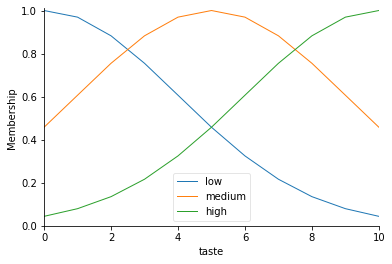

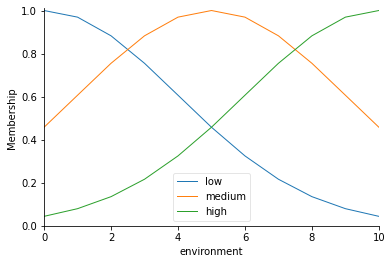

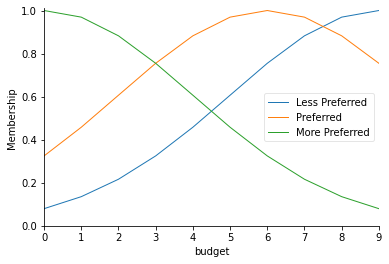

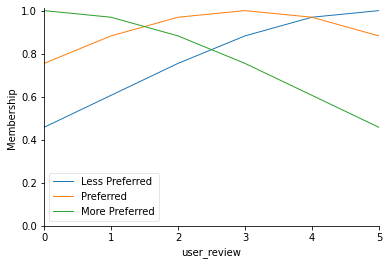

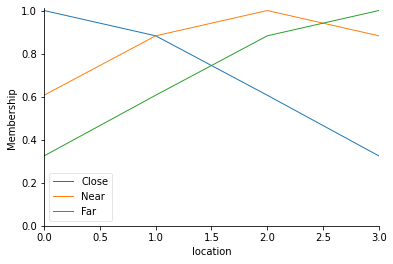

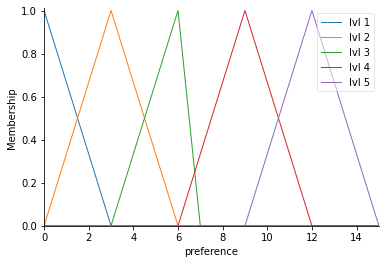

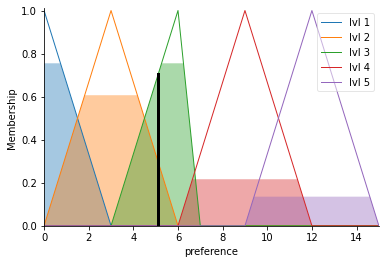

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0,11,1),'taste')
environment = ctrl.Antecedent(np.arange(0,11,1),'environment')
budget = ctrl.Antecedent(np.arange(0,10,1),'budget')
location = ctrl.Antecedent(np.arange(0,4,1),'location')
user_review = ctrl.Antecedent(np.arange(0,6,1),'user_review')

preference = ctrl.Consequent(np.arange(0,16,1),'preference')

taste['low'] = fuzz.gaussmf(taste.universe,0,4)
taste['medium'] = fuzz.gaussmf(taste.universe,5,4)
taste['high'] = fuzz.gaussmf(taste.universe,10,4)

environment['low'] = fuzz.gaussmf(environment.universe,0,4)
environment['medium'] = fuzz.gaussmf(environment.universe,5,4)
environment['high'] = fuzz.gaussmf(environment.universe,10,4)

budget['Less Preferred'] = fuzz.gaussmf(budget.universe,9,4)
budget['Preferred'] = fuzz.gaussmf(budget.universe,6,4)
budget['More Preferred'] = fuzz.gaussmf(budget.universe,0,4)

user_review['Less Preferred'] = fuzz.gaussmf(user_review.universe,5,4)
user_review['Preferred'] = fuzz.gaussmf(user_review.universe,3,4)
user_review['More Preferred'] = fuzz.gaussmf(user_review.universe,0,4)

location['Close'] = fuzz.gaussmf(location.universe,0,2)
location['Near'] = fuzz.gaussmf(location.universe,2,2)
location['Far'] = fuzz.gaussmf(location.universe,3,2)

preference['lvl 1'] = fuzz.trimf(preference.universe,[0,0,3])
preference['lvl 2'] = fuzz.trimf(preference.universe,[0,3,6])
preference['lvl 3'] = fuzz.trimf(preference.universe,[3,6,6])
preference['lvl 4'] = fuzz.trimf(preference.universe,[6,9,12])
preference['lvl 5'] = fuzz.trimf(preference.universe,[9,12,15])

taste.view()
environment.view()
budget.view()
user_review.view()
location.view()
preference.view()

rule1 = ctrl.Rule(taste['low']&environment['low']&budget['More Preferred']&location['Far']&user_review['More Preferred'],preference['lvl 1'])
rule2 = ctrl.Rule(taste['low']&environment['medium']&budget['Preferred']&location['Far']&user_review['More Preferred'],preference['lvl 2'])
rule3 = ctrl.Rule(taste['medium']&environment['medium']&budget['More Preferred']&location['Far']&user_review['More Preferred'],preference['lvl 3'])
rule4 = ctrl.Rule(taste['high']&environment['medium']&budget['Preferred']&location['Far']&user_review['Less Preferred'],preference['lvl 4'])
rule5 = ctrl.Rule(taste['high']&environment['high']&budget['Less Preferred']&location['Close']&user_review['Less Preferred'],preference['lvl 5'])

preference_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
preferencing = ctrl.ControlSystemSimulation(preference_ctrl)

preferencing.input['taste']=3
preferencing.input['environment']=2
preferencing.input['budget']=2
preferencing.input['location']=3
preferencing.input['user_review']=2
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim=preferencing)
                       

ValueError: ignored

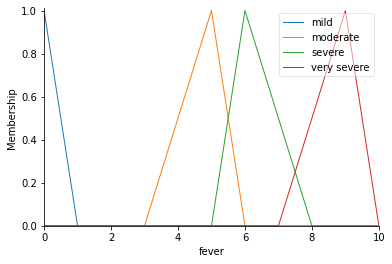

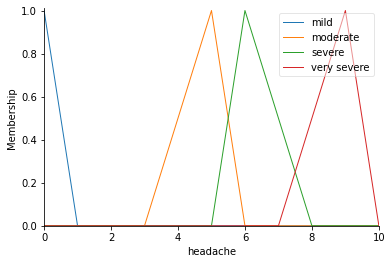

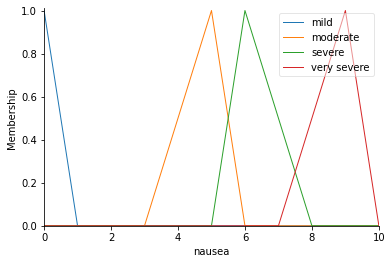

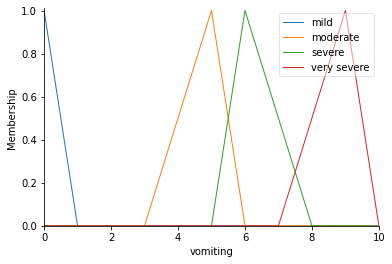

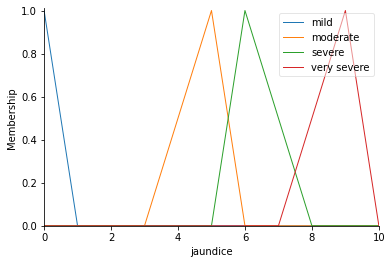

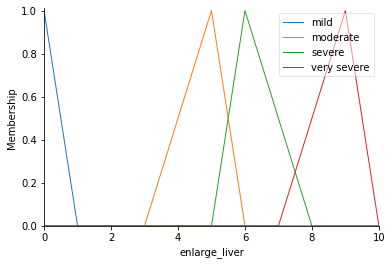

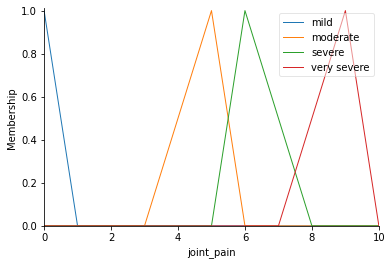

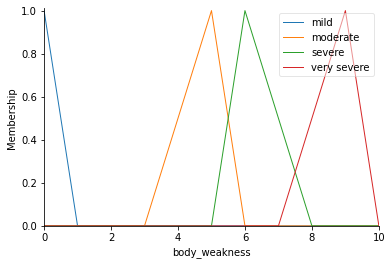

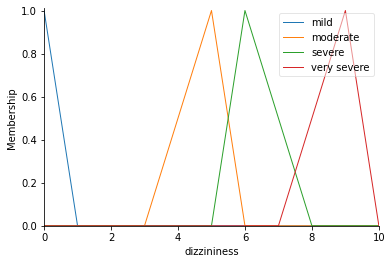

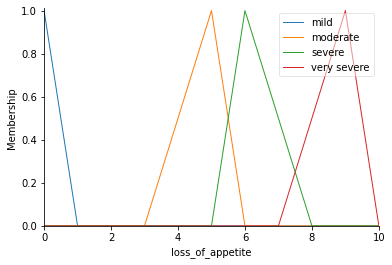

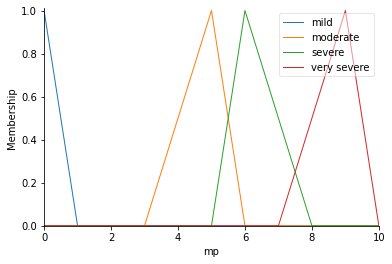

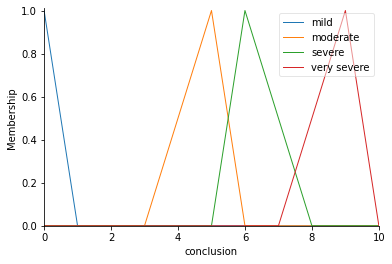

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fever = ctrl.Antecedent(np.arange(0,11,1),'fever')
headache = ctrl.Antecedent(np.arange(0,11,1),'headache')
nausea = ctrl.Antecedent(np.arange(0,11,1),'nausea')
vomiting = ctrl.Antecedent(np.arange(0,11,1),'vomiting')
jaundice = ctrl.Antecedent(np.arange(0,11,1),'jaundice')
enlarge_liver = ctrl.Antecedent(np.arange(0,11,1),'enlarge_liver')
joint_pain = ctrl.Antecedent(np.arange(0,11,1),'joint_pain')
body_weakness = ctrl.Antecedent(np.arange(0,11,1),'body_weakness')
dizzininess = ctrl.Antecedent(np.arange(0,11,1),'dizzininess')
loss_of_appetite = ctrl.Antecedent(np.arange(0,11,1),'loss_of_appetite')
mp = ctrl.Antecedent(np.arange(0,11,1),'mp')

conclusion = ctrl.Consequent(np.arange(0,11,1),'conclusion')

fever['mild'] = fuzz.trimf(fever.universe,[0,0,1])
fever['moderate'] = fuzz.trimf(fever.universe,[3,5,6])
fever['severe'] = fuzz.trimf(fever.universe,[5,6,8])
fever['very severe'] = fuzz.trimf(fever.universe,[7,9,10])

headache['mild'] = fuzz.trimf(headache.universe,[0,0,1])
headache['moderate'] = fuzz.trimf(headache.universe,[3,5,6])
headache['severe'] = fuzz.trimf(headache.universe,[5,6,8])
headache['very severe'] = fuzz.trimf(headache.universe,[7,9,10])

nausea['mild'] = fuzz.trimf(nausea.universe,[0,0,1])
nausea['moderate'] = fuzz.trimf(nausea.universe,[3,5,6])
nausea['severe'] = fuzz.trimf(nausea.universe,[5,6,8])
nausea['very severe'] = fuzz.trimf(nausea.universe,[7,9,10])

vomiting['mild'] = fuzz.trimf(vomiting.universe,[0,0,1])
vomiting['moderate'] = fuzz.trimf(vomiting.universe,[3,5,6])
vomiting['severe'] = fuzz.trimf(vomiting.universe,[5,6,8])
vomiting['very severe'] = fuzz.trimf(vomiting.universe,[7,9,10])

jaundice['mild'] = fuzz.trimf(jaundice.universe,[0,0,1])
jaundice['moderate'] = fuzz.trimf(jaundice.universe,[3,5,6])
jaundice['severe'] = fuzz.trimf(jaundice.universe,[5,6,8])
jaundice['very severe'] = fuzz.trimf(jaundice.universe,[7,9,10])

enlarge_liver['mild'] = fuzz.trimf(enlarge_liver.universe,[0,0,1])
enlarge_liver['moderate'] = fuzz.trimf(enlarge_liver.universe,[3,5,6])
enlarge_liver['severe'] = fuzz.trimf(enlarge_liver.universe,[5,6,8])
enlarge_liver['very severe'] = fuzz.trimf(enlarge_liver.universe,[7,9,10])

joint_pain['mild'] = fuzz.trimf(joint_pain.universe,[0,0,1])
joint_pain['moderate'] = fuzz.trimf(joint_pain.universe,[3,5,6])
joint_pain['severe'] = fuzz.trimf(joint_pain.universe,[5,6,8])
joint_pain['very severe'] = fuzz.trimf(joint_pain.universe,[7,9,10])

body_weakness['mild'] = fuzz.trimf(body_weakness.universe,[0,0,1])
body_weakness['moderate'] = fuzz.trimf(body_weakness.universe,[3,5,6])
body_weakness['severe'] = fuzz.trimf(body_weakness.universe,[5,6,8])
body_weakness['very severe'] = fuzz.trimf(body_weakness.universe,[7,9,10])

dizzininess['mild'] = fuzz.trimf(dizzininess.universe,[0,0,1])
dizzininess['moderate'] = fuzz.trimf(dizzininess.universe,[3,5,6])
dizzininess['severe'] = fuzz.trimf(dizzininess.universe,[5,6,8])
dizzininess['very severe'] = fuzz.trimf(dizzininess.universe,[7,9,10])

loss_of_appetite['mild'] = fuzz.trimf(loss_of_appetite.universe,[0,0,1])
loss_of_appetite['moderate'] = fuzz.trimf(loss_of_appetite.universe,[3,5,6])
loss_of_appetite['severe'] = fuzz.trimf(loss_of_appetite.universe,[5,6,8])
loss_of_appetite['very severe'] = fuzz.trimf(loss_of_appetite.universe,[7,9,10])

conclusion['mild'] = fuzz.trimf(conclusion.universe,[0,0,1])
conclusion['moderate'] = fuzz.trimf(conclusion.universe,[3,5,6])
conclusion['severe'] = fuzz.trimf(conclusion.universe,[5,6,8])
conclusion['very severe'] = fuzz.trimf(conclusion.universe,[7,9,10])

mp['mild'] = fuzz.trimf(mp.universe,[0,0,1])
mp['moderate'] = fuzz.trimf(mp.universe,[3,5,6])
mp['severe'] = fuzz.trimf(mp.universe,[5,6,8])
mp['very severe'] = fuzz.trimf(mp.universe,[7,9,10])

fever.view()
headache.view()
nausea.view()
vomiting.view()
jaundice.view()
enlarge_liver.view()
joint_pain.view()
body_weakness.view()
dizzininess.view()
loss_of_appetite.view()
mp.view()
conclusion.view()


rule1= ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']&dizzininess['severe']&loss_of_appetite['mild']&mp['mild'],conclusion['mild'])
rule2= ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizzininess['severe']&loss_of_appetite['severe']&mp['moderate'],conclusion['moderate'])
rule3 = ctrl.Rule(fever['severe']&headache['moderate']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['severe']&dizzininess['severe']&loss_of_appetite['severe']&mp['moderate'],conclusion['severe'])
rule4 = ctrl.Rule(fever['very severe']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['severe']&body_weakness['severe']&dizzininess['mild']&loss_of_appetite['mild']&mp['severe'],conclusion['very severe'])
rule5 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizzininess['moderate']&loss_of_appetite['severe']&mp['moderate'],conclusion['moderate'])
rule6 = ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']&dizzininess['moderate']&loss_of_appetite['mild']&mp['mild'],conclusion['mild'])
rule7 = ctrl.Rule(fever['mild']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['severe']&body_weakness['severe']&dizzininess['moderate']&loss_of_appetite['moderate']&mp['moderate'],conclusion['severe'])
rule8 = ctrl.Rule(fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['moderate']&enlarge_liver['moderate']&joint_pain['moderate']&body_weakness['moderate']&dizzininess['moderate']&loss_of_appetite['moderate']&mp['moderate'],conclusion['moderate'])
rule9 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['moderate']&enlarge_liver['mild']&joint_pain['severe']&body_weakness['moderate']&dizzininess['moderate']&loss_of_appetite['severe']&mp['moderate'],conclusion['moderate'])
rule10 = ctrl.Rule(fever['mild']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['mild']&dizzininess['mild']&loss_of_appetite['mild']&mp['mild'],conclusion['mild'])
rule11 = ctrl.Rule(fever['severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['very severe']&dizzininess['severe']&loss_of_appetite['severe']&mp['moderate'],conclusion['very severe'])
rule12 = ctrl.Rule(fever['moderate']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['moderate']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']&dizzininess['moderate']&loss_of_appetite['mild']&mp['moderate'],conclusion['severe'])
rule13 = ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['moderate']&dizzininess['mild']&loss_of_appetite['moderate']&mp['moderate'],conclusion['moderate'])
rule14 = ctrl.Rule(fever['severe']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['severe']&dizzininess['moderate']&loss_of_appetite['moderate']&mp['severe'],conclusion['severe'])
rule15 = ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['severe']&dizzininess['mild']&loss_of_appetite['severe']&mp['moderate'],conclusion['severe'])
rule16 = ctrl.Rule(fever['very severe']&headache['moderate']&nausea['mild']&vomiting['moderate']&jaundice['severe']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['very severe']&dizzininess['severe']&loss_of_appetite['mild']&mp['moderate'],conclusion['very severe'])
rule17 = ctrl.Rule(fever['mild']&headache['very severe']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['moderate']&dizzininess['very severe']&loss_of_appetite['mild']&mp['moderate'],conclusion['very severe'])
rule18 = ctrl.Rule(fever['moderate']&headache['very severe']&nausea['very severe']&vomiting['mild']&jaundice['severe']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']&dizzininess['very severe']&loss_of_appetite['very severe']&mp['severe'],conclusion['very severe'])
rule19 = ctrl.Rule(fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizzininess['moderate']&loss_of_appetite['moderate']&mp['moderate'],conclusion['moderate'])
rule20 = ctrl.Rule(fever['very severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['severe']&dizzininess['severe']&loss_of_appetite['severe']&mp['moderate'],conclusion['very severe'])


conclusion_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
conclusioning = ctrl.ControlSystemSimulation(conclusion_ctrl)

conclusioning.input['fever']=1
conclusioning.input['headache']=3
conclusioning.input['nausea']=3
conclusioning.input['vomiting']=5
conclusioning.input['jaundice']=6
conclusioning.input['enlarge_liver']=7
conclusioning.input['joint_pain']=6
conclusioning.input['body_weakness']=8
conclusioning.input['dizzininess']=9
conclusioning.input['loss_of_appetite']=8
conclusioning.input['mp']=1
conclusioning.compute()
print(conclusioning.output['conclusion'])
conclusion.view(sim=conclusioning)
